In [1]:
import os
dir = os.getcwd()
dir

'/home/rahuliyer/code/hramzan01/market/notebooks'

In [2]:
! mkdir -p data

In [3]:
url = 'https://files.energy-stats.uk/csv_output/'

csv_list = ['csv_agile_C_London.csv', 'csv_agileoutgoing_C_London.csv', 'csv_tracker_C_London.csv']



for file in csv_list:
    file_path = os.path.join(url, file)
    !curl {file_path} -o data/{file}

In [4]:
! tree

.
├── data
│   ├── csv_agile_C_London.csv
│   ├── csv_agileoutgoing_C_London.csv
│   └── csv_tracker_C_London.csv
├── eda_dataset.ipynb
├── energy-price.ipynb
├── project_brief.ipynb
└── weather_data.ipynb

1 directory, 7 files


In [5]:
import pandas as pd
csv_name = ['csv_agile_C_London', 'csv_agileoutgoing_C_London', 'csv_tracker_C_London']

for i in range(len(csv_name)):
    csv_path = os.path.join(dir, 'data',csv_list[i])
    print(f'loading {csv_path}')
    csv_name[i] = pd.read_csv(csv_path)

loading /home/rahuliyer/code/hramzan01/market/notebooks/data/csv_agile_C_London.csv
loading /home/rahuliyer/code/hramzan01/market/notebooks/data/csv_agileoutgoing_C_London.csv
loading /home/rahuliyer/code/hramzan01/market/notebooks/data/csv_tracker_C_London.csv


In [6]:
csv_agile_C_London = pd.read_csv(os.path.join(dir, 'data',csv_list[0]))
csv_agileoutgoing_C_London = pd.read_csv(os.path.join(dir, 'data',csv_list[1]))
csv_tracker_C_London = pd.read_csv(os.path.join(dir, 'data',csv_list[2]))

In [7]:
column_names=['date_time', 'time', 'Letter', 'City', 'Price']

In [8]:
csv_agile_C_London.shape, csv_agileoutgoing_C_London.shape, csv_tracker_C_London.shape

((105981, 5), (84431, 5), (1261, 5))

In [9]:
df_list = [csv_agile_C_London, csv_agileoutgoing_C_London, csv_tracker_C_London]

for df in df_list:
    df.columns = column_names

In [11]:
csv_agile_C_London['date_time'] = pd.to_datetime(csv_agile_C_London['date_time'])
csv_agile_C_London.head()

,date_time,time,Letter,City,Price
0,2018-02-21 00:30:00+00:00,00:30,C,London,10.0695
1,2018-02-21 01:00:00+00:00,01:00,C,London,10.1640
2,2018-02-21 01:30:00+00:00,01:30,C,London,9.7020
3,2018-02-21 02:00:00+00:00,02:00,C,London,9.6600
4,2018-02-21 02:30:00+00:00,02:30,C,London,9.7125


In [12]:
csv_agileoutgoing_C_London['date_time'] = pd.to_datetime(csv_agileoutgoing_C_London['date_time'])
csv_agileoutgoing_C_London.head()

,date_time,time,Letter,City,Price
0,2019-05-15 23:30:00+00:00,00:30,C,London,4.24
1,2019-05-16 00:00:00+00:00,01:00,C,London,4.24
2,2019-05-16 00:30:00+00:00,01:30,C,London,4.24
3,2019-05-16 01:00:00+00:00,02:00,C,London,4.24
4,2019-05-16 01:30:00+00:00,02:30,C,London,4.24


In [13]:
csv_tracker_C_London['date_time'] = pd.to_datetime(csv_tracker_C_London['date_time'])
csv_tracker_C_London.head()

,date_time,time,Letter,City,Price
0,2021-01-02 00:00:00+00:00,00:00,C,London,15.17
1,2021-01-03 00:00:00+00:00,00:00,C,London,14.47
2,2021-01-04 00:00:00+00:00,00:00,C,London,14.72
3,2021-01-05 00:00:00+00:00,00:00,C,London,14.74
4,2021-01-06 00:00:00+00:00,00:00,C,London,25.27


In [14]:
csv_tracker_C_London.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   date_time  1261 non-null   datetime64[ns, UTC]
 1   time       1261 non-null   object             
 2   Letter     1261 non-null   object             
 3   City       1261 non-null   object             
 4   Price      1261 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(3)
memory usage: 49.4+ KB


In [15]:
df_list = [csv_agile_C_London, csv_agileoutgoing_C_London, csv_tracker_C_London]

for df in df_list:
    df.set_index('date_time', inplace=True)

In [16]:
csv_agile_C_London.head()

,time,Letter,City,Price
date_time,,,,
2018-02-21 00:30:00+00:00,00:30,C,London,10.0695
2018-02-21 01:00:00+00:00,01:00,C,London,10.1640
2018-02-21 01:30:00+00:00,01:30,C,London,9.7020
2018-02-21 02:00:00+00:00,02:00,C,London,9.6600
2018-02-21 02:30:00+00:00,02:30,C,London,9.7125


In [17]:
csv_agileoutgoing_C_London.head()

,time,Letter,City,Price
date_time,,,,
2019-05-15 23:30:00+00:00,00:30,C,London,4.24
2019-05-16 00:00:00+00:00,01:00,C,London,4.24
2019-05-16 00:30:00+00:00,01:30,C,London,4.24
2019-05-16 01:00:00+00:00,02:00,C,London,4.24
2019-05-16 01:30:00+00:00,02:30,C,London,4.24


In [18]:
csv_tracker_C_London.head()

,time,Letter,City,Price
date_time,,,,
2021-01-02 00:00:00+00:00,00:00,C,London,15.17
2021-01-03 00:00:00+00:00,00:00,C,London,14.47
2021-01-04 00:00:00+00:00,00:00,C,London,14.72
2021-01-05 00:00:00+00:00,00:00,C,London,14.74
2021-01-06 00:00:00+00:00,00:00,C,London,25.27


In [21]:
csv_tracker_C_London.index

DatetimeIndex(['2021-01-02 00:00:00+00:00', '2021-01-03 00:00:00+00:00',
               '2021-01-04 00:00:00+00:00', '2021-01-05 00:00:00+00:00',
               '2021-01-06 00:00:00+00:00', '2021-01-07 00:00:00+00:00',
               '2021-01-08 00:00:00+00:00', '2021-01-09 00:00:00+00:00',
               '2021-01-10 00:00:00+00:00', '2021-01-11 00:00:00+00:00',
               ...
               '2024-02-28 00:00:00+00:00', '2024-02-29 00:00:00+00:00',
               '2024-03-01 00:00:00+00:00', '2024-03-02 00:00:00+00:00',
               '2024-03-03 00:00:00+00:00', '2024-03-04 00:00:00+00:00',
               '2024-03-05 00:00:00+00:00', '2024-03-06 00:00:00+00:00',
               '2024-03-07 00:00:00+00:00', '2024-03-08 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date_time', length=1261, freq=None)

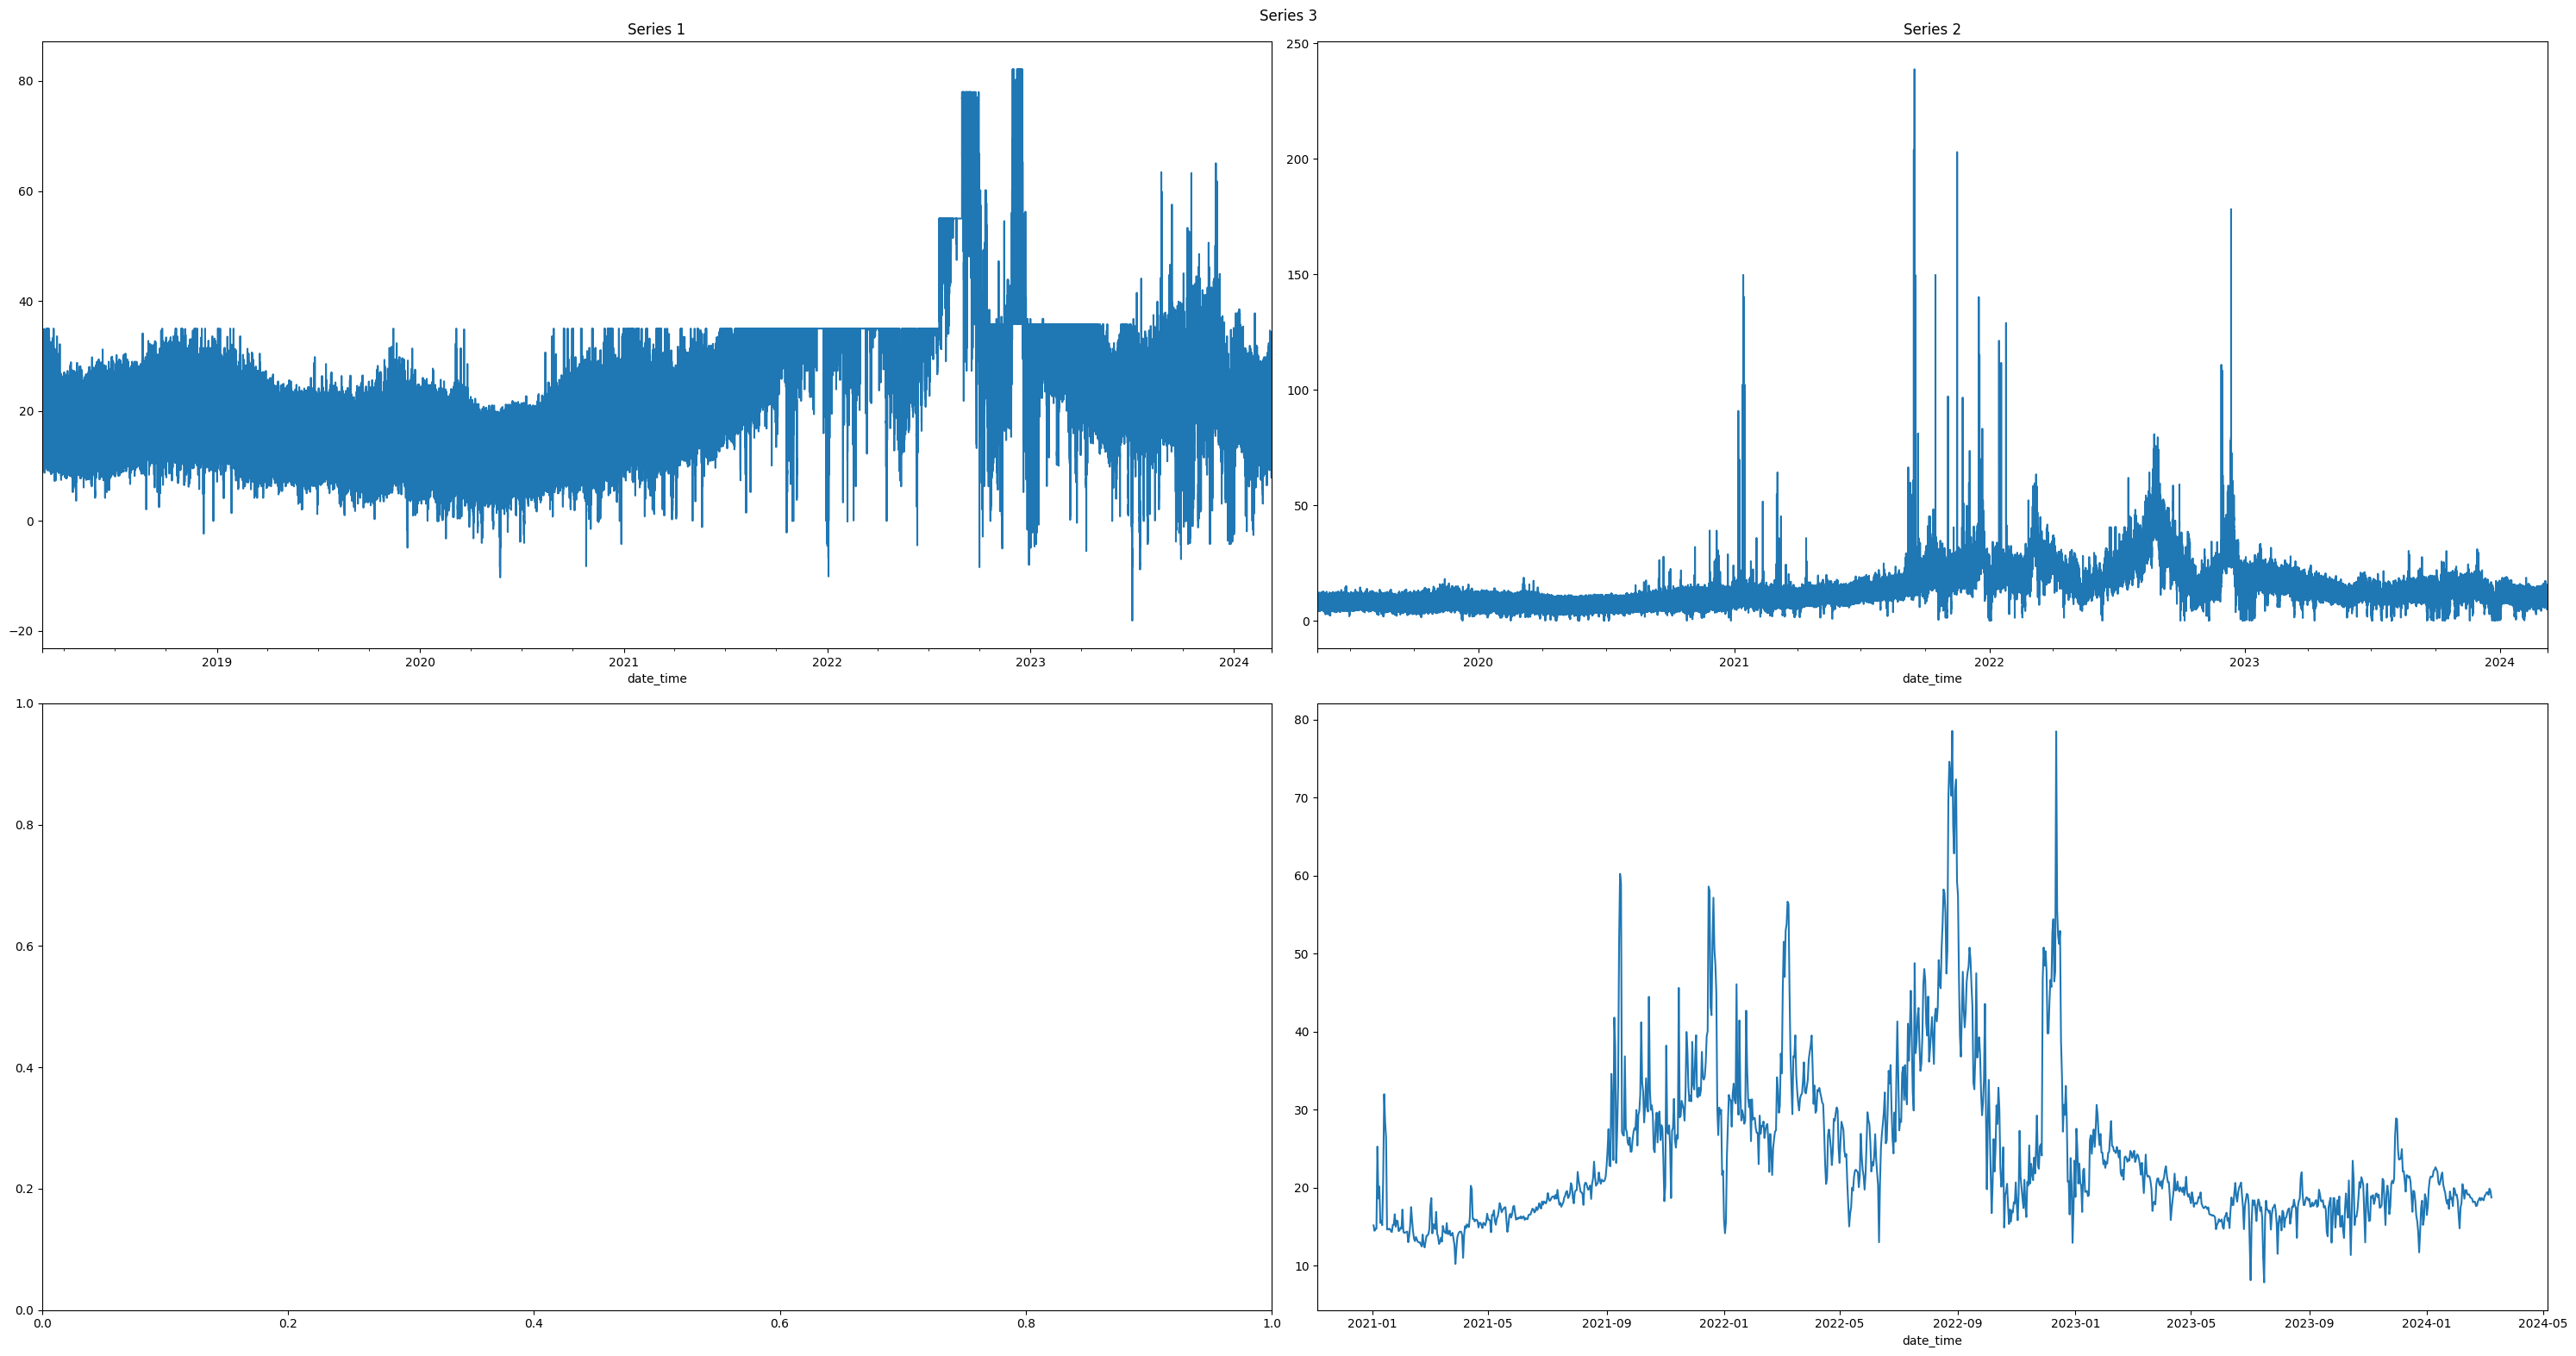

In [22]:
import matplotlib.pyplot as plt

df_list = [csv_agile_C_London, csv_agileoutgoing_C_London, csv_tracker_C_London]

fig, axs = plt.subplots(2, 2, figsize=(30, 16))

csv_agile_C_London['Price'].plot(ax=axs[0, 0], title='Series 1')
csv_agileoutgoing_C_London['Price'].plot(ax=axs[0, 1], title='Series 2')
csv_tracker_C_London['Price'].plot(ax=axs[1, 1], subplots=True, title='Series 3')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

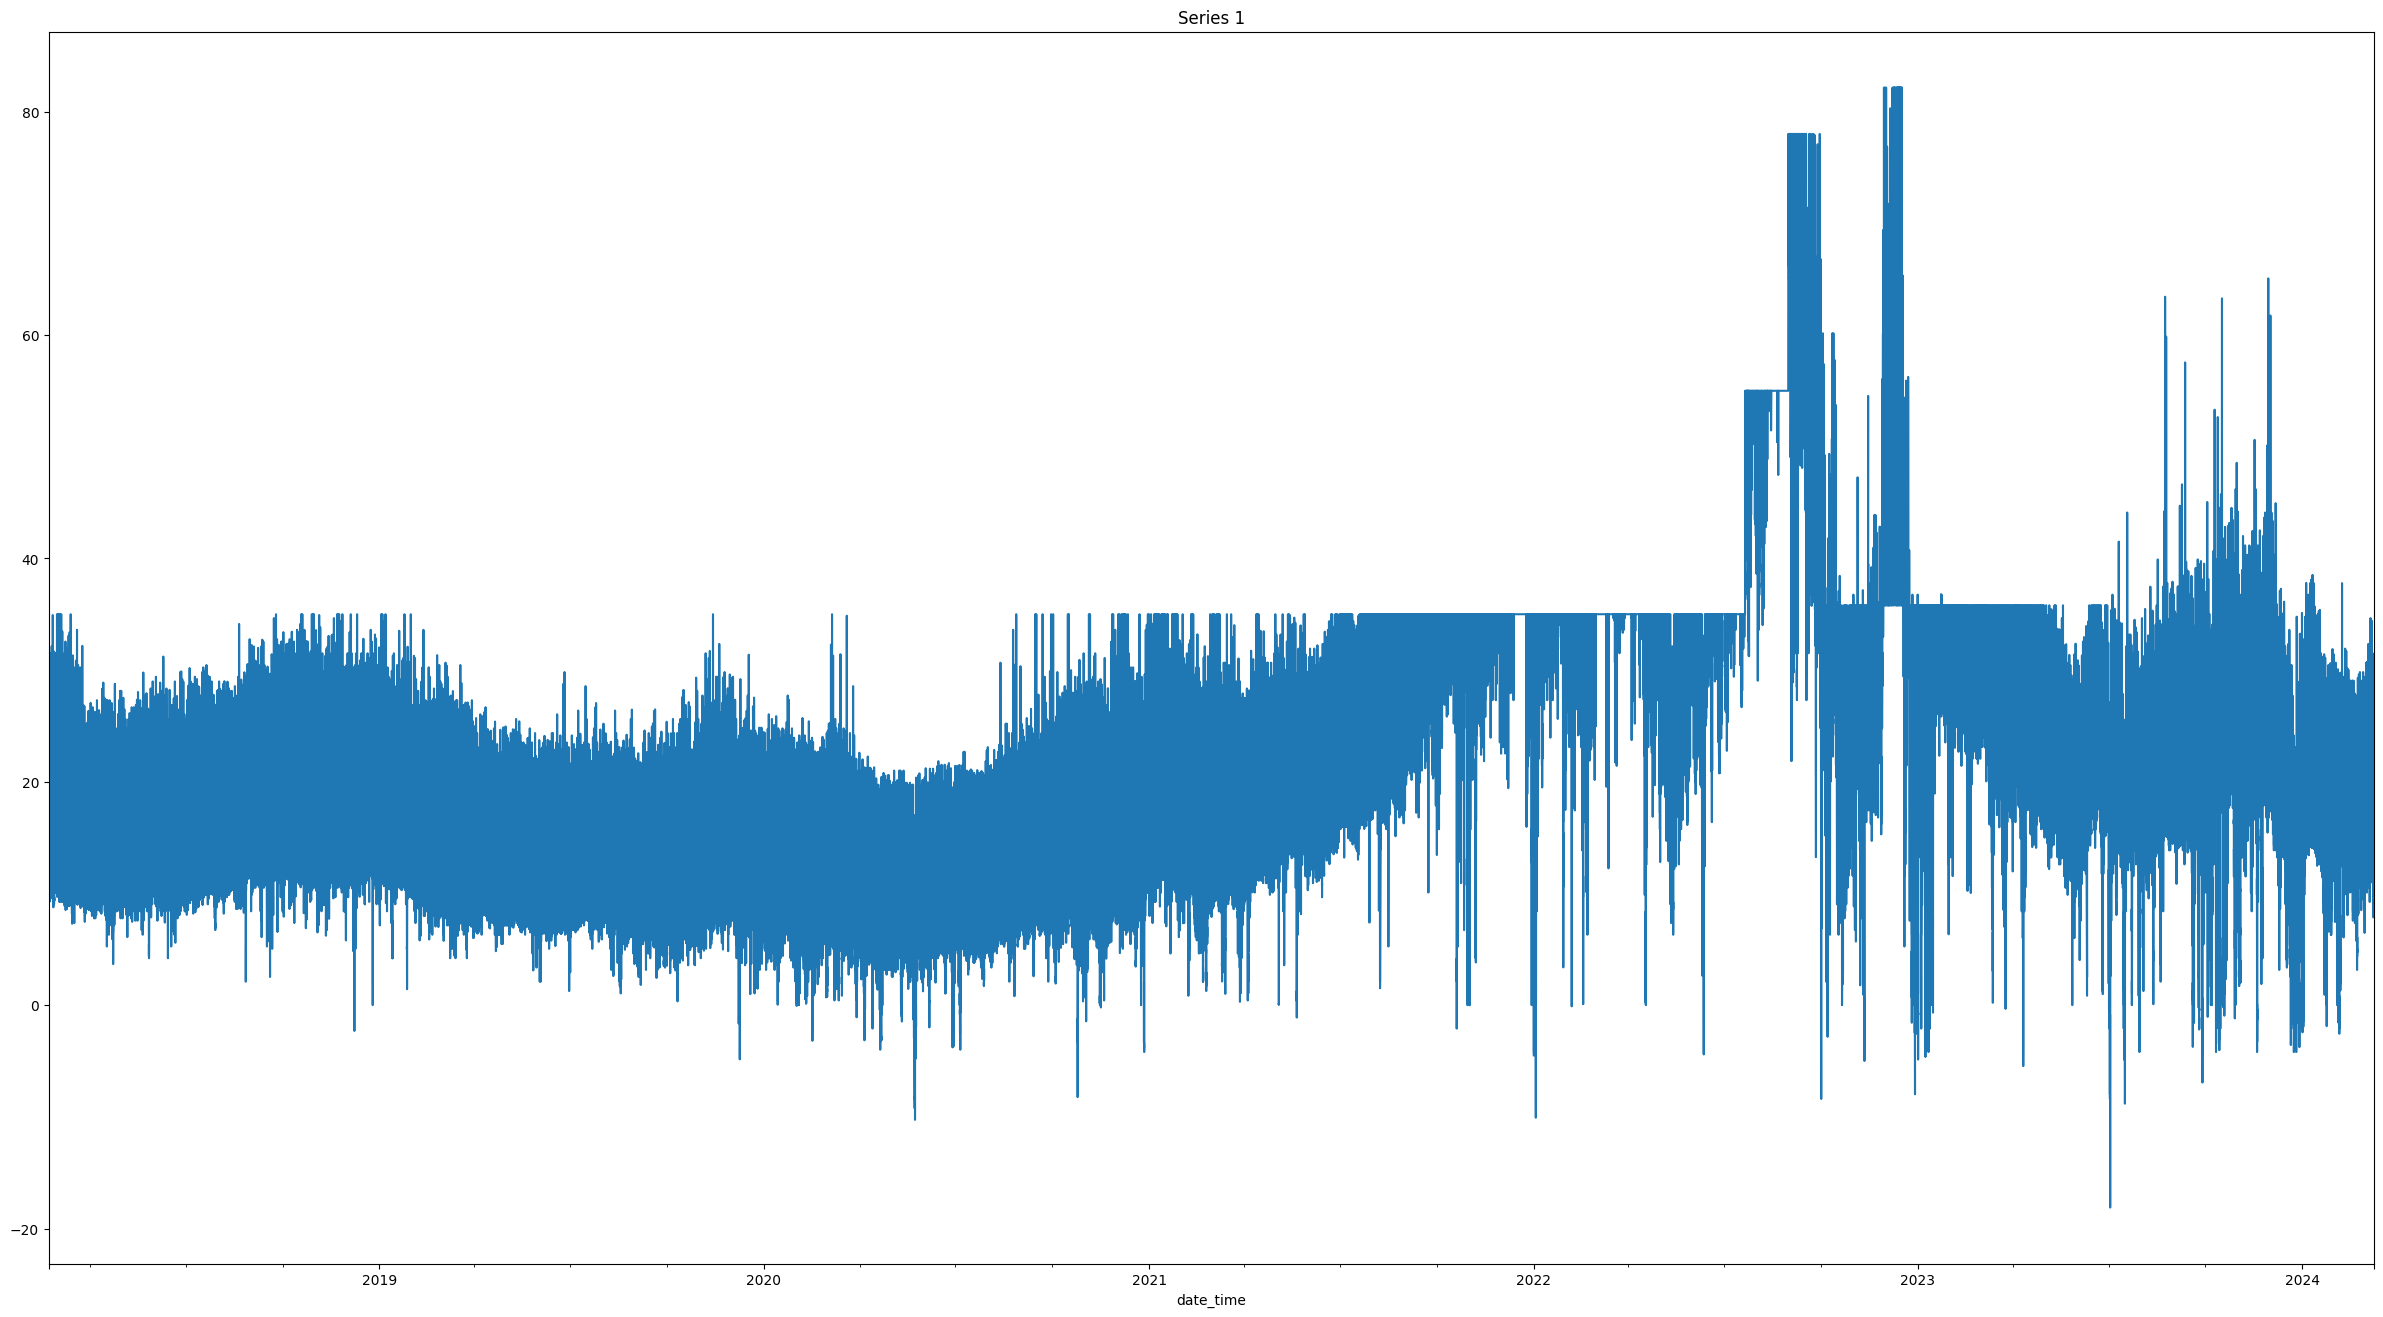

In [23]:
plt.figure(figsize=(30, 16))

csv_agile_C_London['Price'].plot(title='Series 1')

plt.show()

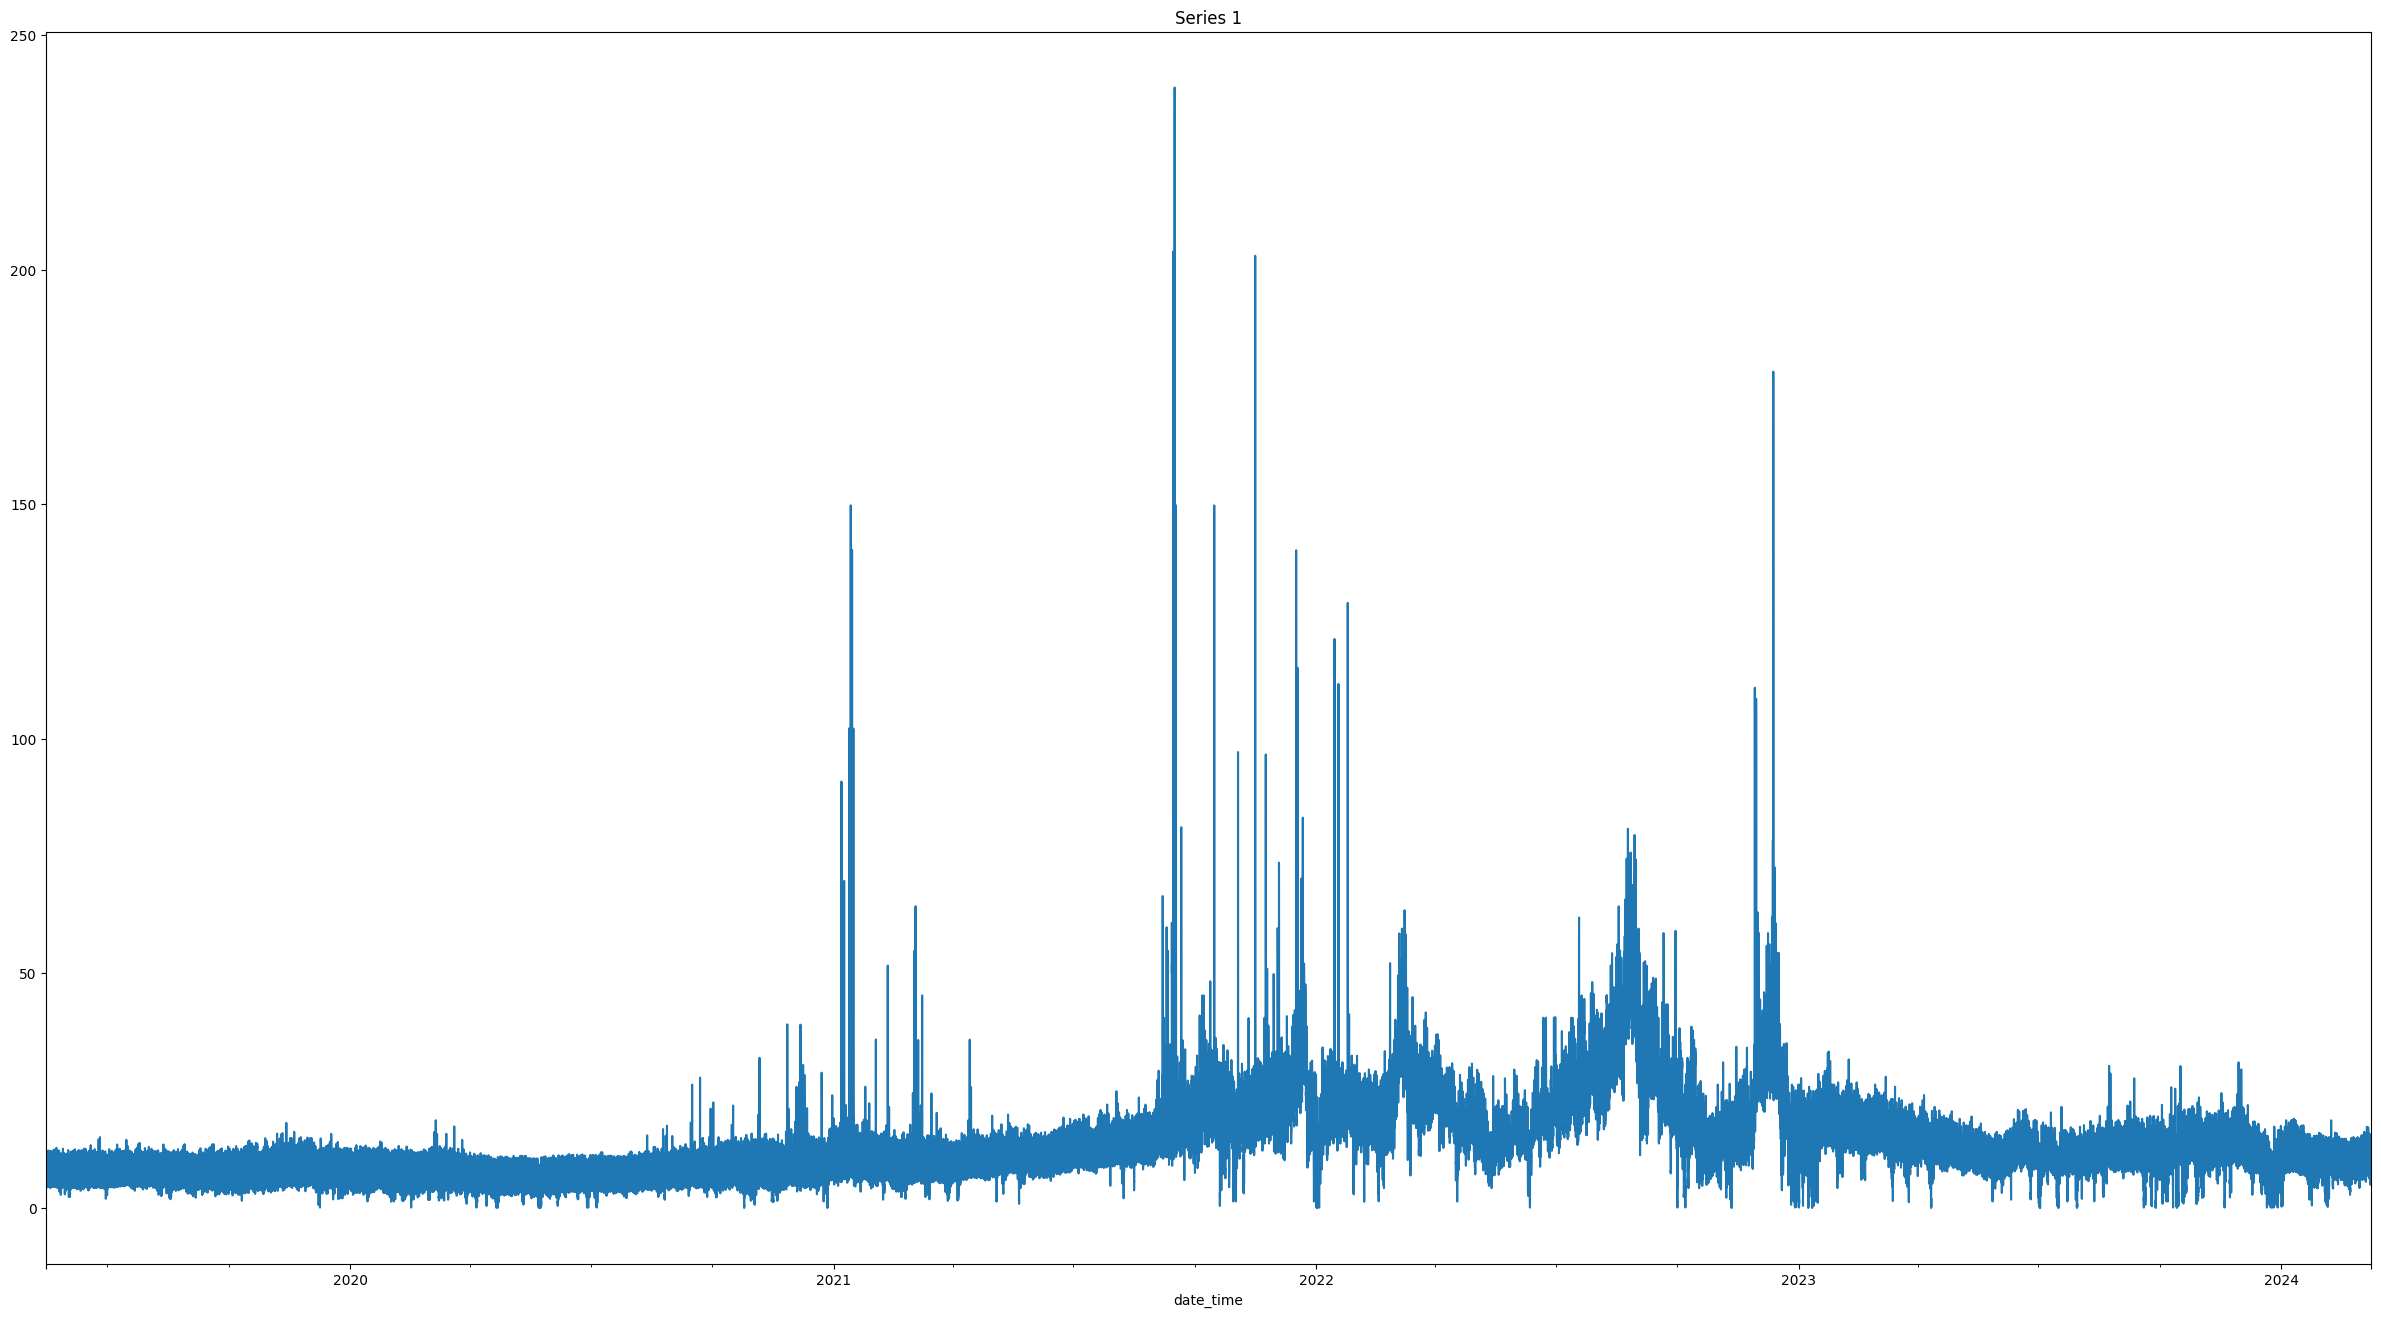

In [26]:
plt.figure(figsize=(30, 16))

csv_agileoutgoing_C_London['Price'].plot(title='Series 1')

plt.show()
# csv_agileoutgoing_C_London['Price'].plot(ax=axs[0, 1], title='Series 2')
# csv_tracker_C_London['Price'].plot(ax=axs[1, 1], subplots=True, title='Series 3')

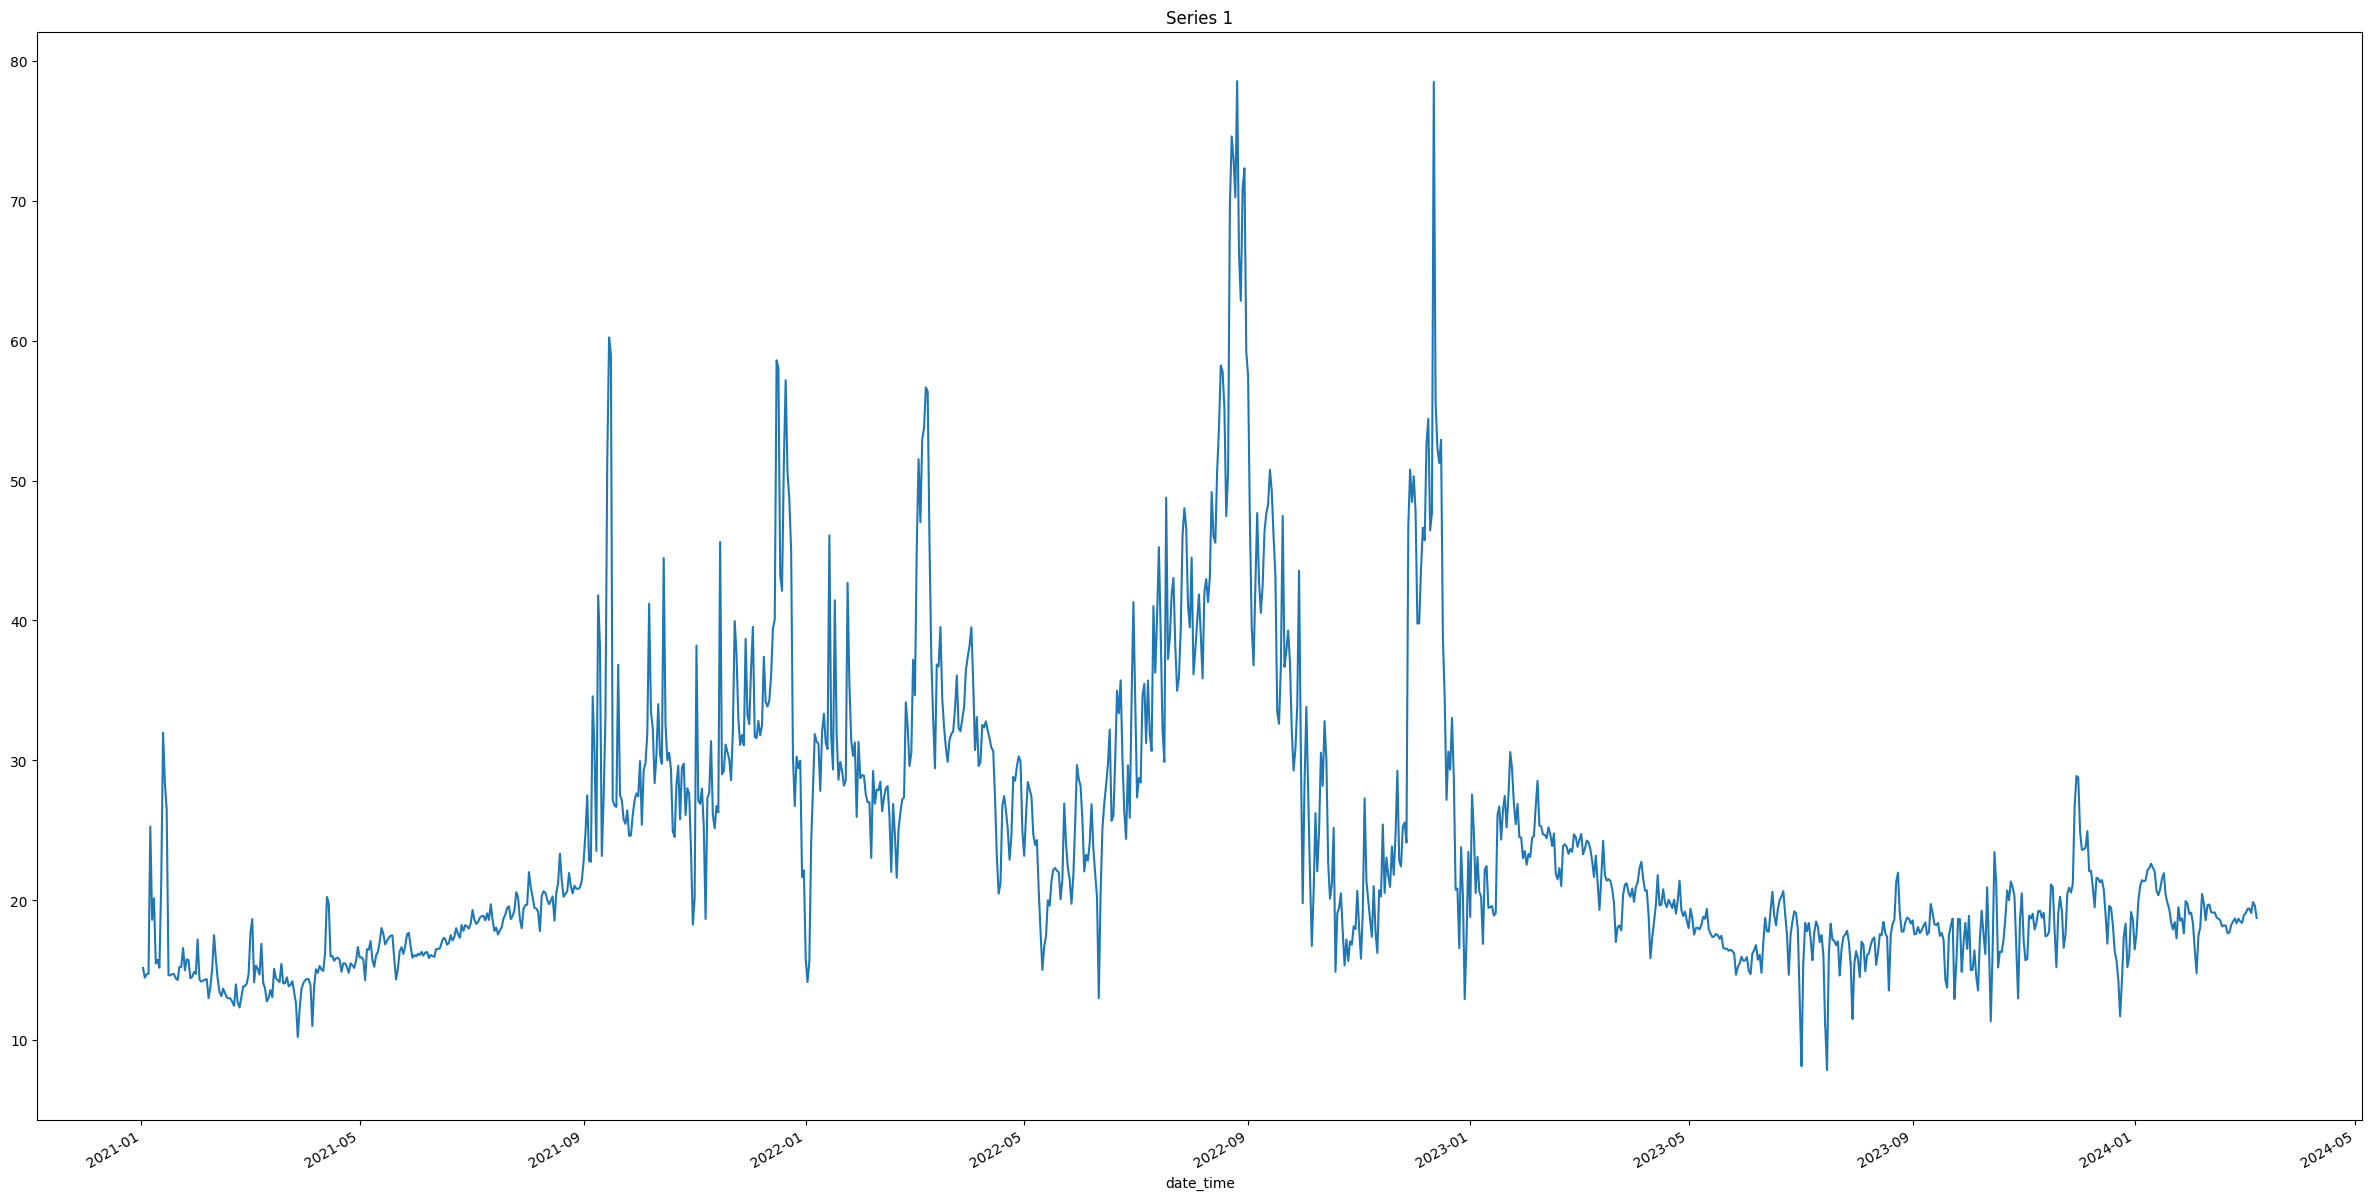

In [27]:
plt.figure(figsize=(30, 16))

csv_tracker_C_London['Price'].plot(title='Series 1')

plt.show()
# csv_agileoutgoing_C_London['Price'].plot(ax=axs[0, 1], title='Series 2')
# csv_tracker_C_London['Price'].plot(ax=axs[1, 1], subplots=True, title='Series 3')

In [28]:
csv_agile_C_London.shape, csv_agileoutgoing_C_London.shape, csv_tracker_C_London.shape

((105981, 4), (84431, 4), (1261, 4))

In [29]:
df_list = [csv_agile_C_London, csv_agileoutgoing_C_London, csv_tracker_C_London]

df_list[0].index.min(), df_list[0].index.max()

(Timestamp('2018-02-21 00:30:00+0000', tz='UTC'),
 Timestamp('2024-03-08 22:30:00+0000', tz='UTC'))

In [30]:
df_list = [csv_agile_C_London, csv_agileoutgoing_C_London, csv_tracker_C_London]

min_time_list=[]
max_time_list=[]

for df in df_list:
    min_time_list.append(df.index.min())
    max_time_list.append(df.index.max())

min(min_time_list), max(max_time_list)

(Timestamp('2018-02-21 00:30:00+0000', tz='UTC'),
 Timestamp('2024-03-08 22:30:00+0000', tz='UTC'))

In [31]:
min_time_list, max_time_list

([Timestamp('2018-02-21 00:30:00+0000', tz='UTC'),
  Timestamp('2019-05-15 23:30:00+0000', tz='UTC'),
  Timestamp('2021-01-02 00:00:00+0000', tz='UTC')],
 [Timestamp('2024-03-08 22:30:00+0000', tz='UTC'),
  Timestamp('2024-03-08 22:30:00+0000', tz='UTC'),
  Timestamp('2024-03-08 00:00:00+0000', tz='UTC')])

In [32]:
df_list = [csv_agile_C_London, csv_agileoutgoing_C_London, csv_tracker_C_London]
df_list[0].tail(2)

,time,Letter,City,Price
date_time,,,,
2024-03-08 22:00:00+00:00,22:00,C,London,12.957
2024-03-08 22:30:00+00:00,22:30,C,London,9.240


In [33]:
df_list[1].tail(2)

,time,Letter,City,Price
date_time,,,,
2024-03-08 22:00:00+00:00,22:00,C,London,7.16
2024-03-08 22:30:00+00:00,22:30,C,London,5.48


In [34]:
df_list[2].tail(2)

,time,Letter,City,Price
date_time,,,,
2024-03-07 00:00:00+00:00,00:00,C,London,19.6140
2024-03-08 00:00:00+00:00,00:00,C,London,18.7425


In [35]:
df_list[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105981 entries, 2018-02-21 00:30:00+00:00 to 2024-03-08 22:30:00+00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    105981 non-null  object 
 1   Letter  105981 non-null  object 
 2   City    105981 non-null  object 
 3   Price   105981 non-null  float64
dtypes: float64(1), object(3)
memory usage: 4.0+ MB


In [36]:
df_list[0]['Price'].describe()

count    105981.000000
mean         18.738625
std          12.545338
min         -18.123000
25%           9.261000
50%          14.700000
75%          26.985000
max          82.143285
Name: Price, dtype: float64

In [37]:
df_list[1]['Price'].describe()

count    84431.000000
mean        11.666443
std          9.257657
min          0.000000
25%          5.350000
50%          9.200000
75%         15.080000
max        238.800000
Name: Price, dtype: float64

In [38]:
df_list[2]['Price'].describe()

count    1261.000000
mean       23.724566
std        10.179758
min         7.860000
25%        17.350000
50%        19.970000
75%        27.610000
max        78.550000
Name: Price, dtype: float64

In [ ]:
import requests

url = 'https://api.bmreports.com'
response = requests.get(url).json()

In [42]:
df_list = [csv_agile_C_London, csv_agileoutgoing_C_London, csv_tracker_C_London]

colour_list = ['red', 'green', 'blue']

# plt.figure(figsize=(25, 25))

# for i, df in enumerate(df_list):
#     # plt.scatter(x=df.index, y=df['Price'])
#     df['Price'].plot(title=df, color = colour_list[i])
#     # csv_tracker_C_London['Price'].plot(title='Series 1')

# # Add title and legend and xlim
# # start_date = pd.to_datetime('2018-02-21 00:30:00+00:00')
# # end_date = pd.to_datetime('2024-03-08 22:30:00+00:00')
# # plt.xlim(start_date, end_date)
# # plt.xticks([start_date, end_date])
# plt.title('Overlay of Three plots')

# # Show the plot
# plt.show()